Intro & Additional Use Cases:
https://realpython.com/numpy-random-number-generator/

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## Numpy's Random Number Generator

In [2]:
my_number_generator = np.random.default_rng()
my_number_generator

Generator(PCG64) at 0x1825BCB64A0

In [3]:
my_number_generator.random()

0.9602667148159579

In [122]:
np.random.standard_normal()

0.2088635950047554

Passing a seed value determines the sequence of random numbers generated. Passing identical seed values into separate BitGenerator objects forces them to produce the same output. 

In [4]:
randy = np.random.default_rng(seed=10)
beatrice = np.random.default_rng(seed=10)

In [5]:
print(randy.random())
print(beatrice.random())

0.9560017096289753
0.9560017096289753


The random() method includes a dtype parameter, which is rarely used. By default, this is set to np.float64 which generates 64-bit floats. 
If you need to, you can also generate random integers. You do this using the Generator object’s .integers() method.

Integers() takes at least 1 positional argument that specifies the maximum number > randy.integers(3)
<br> But you can also set a low and high value.

Iterate to generate more than one number.

In [12]:
for i in range(5):
    print(randy.integers(10))
    
for i in range(5):
    (randy.integers(low=50, high=5000))

8
1
9
7
3
739
1973
4537
3939
1169


Uniform gives a range for the random number

In [40]:
beatrice.uniform(low=3.5,high=5.6)

5.239734259076514

## Random NumPy Arrays

Giving the generator an size will automatically produce an array. 

In [18]:
randy.random(size=5)

array([0.30631787, 0.96983037, 0.51783421, 0.32247456, 0.28243352])

In [20]:
randy.random(size=(5,))

array([0.33951558, 0.14856874, 0.45701939, 0.43786436, 0.57421759])

In [19]:
randy.random(size=(5,3))

array([[0.605865  , 0.33376446, 0.67864877],
       [0.15442507, 0.24977552, 0.86989425],
       [0.60036782, 0.26198306, 0.1494149 ],
       [0.13678915, 0.24892094, 0.38282467],
       [0.64907906, 0.83756376, 0.77603195]])

In [116]:
randy.integers(size=(2,3), low=1, high=10)

array([[8, 9, 5],
       [8, 3, 9]], dtype=int64)

In [117]:
blue = randy.integers(size=(2,3), low=1, high=10)
print(blue)

[[6 6 1]
 [4 4 6]]


## Generating a random dataset using a function f(x) with noise

In this example, they use the function "np.random.randn", an out of date function. 

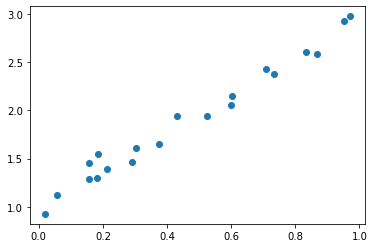

In [82]:
true_b = 1
true_w = 2
N = 20

np.random.seed(42)
x = np.random.rand(N, 1) #N is the number of points
epsilon = (.1 * np.random.randn(N, 1)) #an array; the "randn" gives us a standard normal deviation
y = true_b + true_w * x + epsilon
plt.scatter(x,y)

#### Instead of the "randn" method, we want to use "standard_normal" instead.

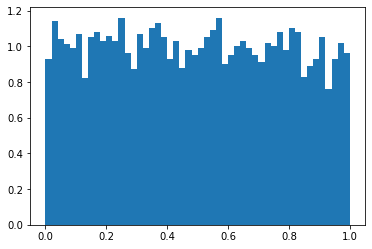

In [96]:
#Here is a set of randomly generated numbers
bees = randy.random(size=5000)
plt.hist(bees, bins = 50, density = True) 
plt.show()

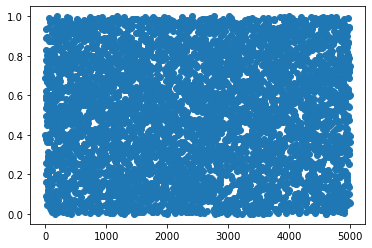

In [93]:
plt.scatter(range(len(bees)),bees)

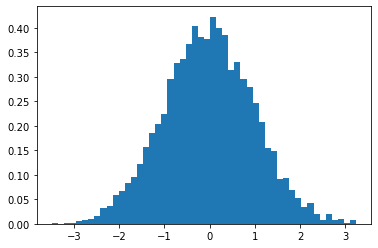

In [85]:
#Here is a set of randomly generated numbers with a normal distribution
spiders = randy.standard_normal(size=5000) 
plt.hist(spiders, bins = 50, density = True) 
plt.show()

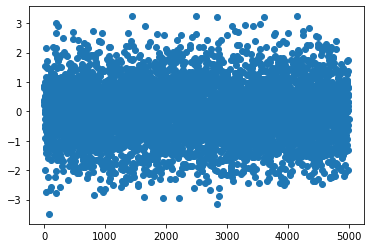

In [94]:
plt.scatter(range(len(spiders)),spiders)

But I also want my dataset x to be between 0 and 100. <br>
But you can't use standard_normal and uniform at the same time. 

In [97]:
dragonfly = randy.random.standard_normal(size=5000,low=0,high=100)

AttributeError: 'builtin_function_or_method' object has no attribute 'standard_normal'

Instead, you have to generate numbers that are drawn from a normal distribution, then scale them to fit within your desired range. 

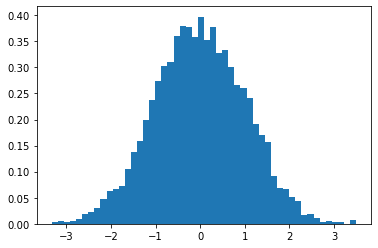

In [125]:
#A random set of standard normal numbers, with no range
spiders = randy.standard_normal(size=5000)
plt.hist(spiders, bins = 50, density = True) 
plt.show()

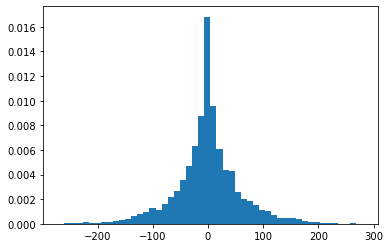

In [99]:
#ladybugs, a random list of number with range, multiplied by the standard normal
ladybugs = (randy.uniform(size=5000,low=0,high=100))*spiders 
plt.hist(ladybugs, bins = 50, density = True) 
plt.show()

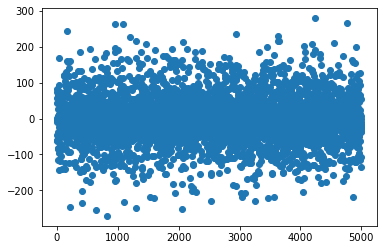

In [100]:
plt.scatter(range(len(ladybugs)),ladybugs)

#### Now I generate a dataset of x and y values with the function f(x)

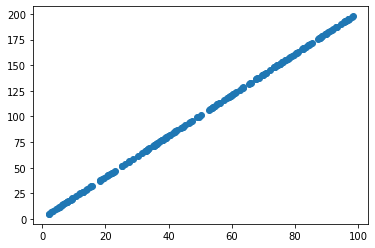

In [101]:
b = 1
w = 2

x = randy.uniform(size=200,low=1, high=100) #X is truly random
y = b + w * x
plt.scatter(x,y)

#### Generate a dataset, but add some noise using a normally distributed factor "epsilon"

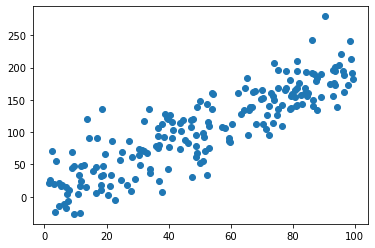

In [102]:
b = 1
w = 2

x = randy.uniform(size=200,low=1, high=100) 
epsilon = randy.standard_normal(size = 200) * 30 #adjust the factor to get more or less noise
y = b + w * x + epsilon 
plt.scatter(x,y)

#### An example of a randomly generated dataset that is not normally distributed for noise

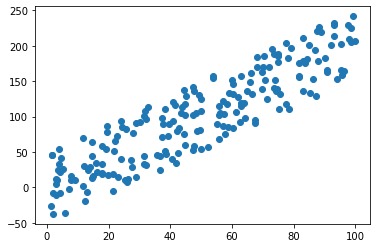

In [103]:
b = 1
w = 2

x = randy.uniform(size=200,low=1, high=100)
epsilon = randy.uniform(size = 200, low=-50, high=50) #Instead I give epsilon a range of deviation
y = b + w * x + epsilon
plt.scatter(x,y)

#### Some examples with higher and lower values

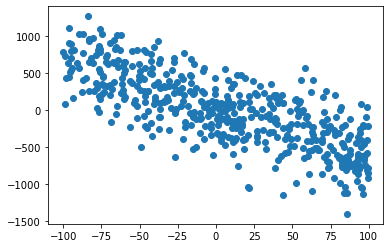

In [111]:
b = 30
w = -6

x = randy.uniform(size=500,low=-100, high=100) 
epsilon = randy.standard_normal(size = 500) * 300
y = b + w *x + epsilon 
train = np.array([x,y])
plt.scatter(x,y)

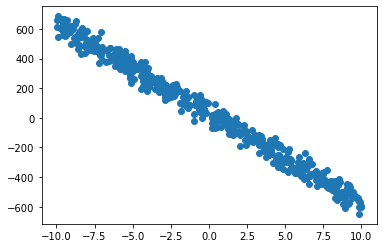

In [115]:
b = 30
w = -60

x = randy.uniform(size=500,low=-10, high=10) 
epsilon = randy.standard_normal(size = 500) * 40
y = b + w *x + epsilon 
train = np.array([x,y])
plt.scatter(x,y)

In [129]:
s = randy.standard_normal(800)
print(s.shape)

(800,)


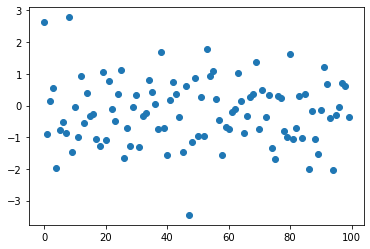

In [163]:
jam = randy.standard_normal(100)
plt.scatter(range(len(jam)),jam)

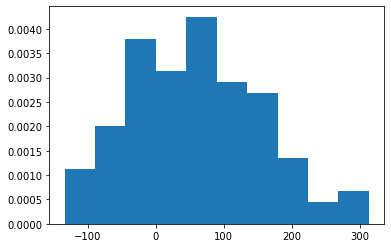

In [157]:
plt.hist(jam, density = True) 
plt.show()

In [165]:
print(len(jam))

100


In [168]:
RANKS = "2 3 4 5 6 7 8 9 10 J Q K A".split()
SUITS = "♣ ♢ ♡ ♠".split()

for s in SUITS:
    for r in RANKS:
        print(r+s)

2♣
3♣
4♣
5♣
6♣
7♣
8♣
9♣
10♣
J♣
Q♣
K♣
A♣
2♢
3♢
4♢
5♢
6♢
7♢
8♢
9♢
10♢
J♢
Q♢
K♢
A♢
2♡
3♡
4♡
5♡
6♡
7♡
8♡
9♡
10♡
J♡
Q♡
K♡
A♡
2♠
3♠
4♠
5♠
6♠
7♠
8♠
9♠
10♠
J♠
Q♠
K♠
A♠


In [177]:
deck = np.array([r + s for s in SUITS for r in RANKS])
print(deck)

['2♣' '3♣' '4♣' '5♣' '6♣' '7♣' '8♣' '9♣' '10♣' 'J♣' 'Q♣' 'K♣' 'A♣' '2♢'
 '3♢' '4♢' '5♢' '6♢' '7♢' '8♢' '9♢' '10♢' 'J♢' 'Q♢' 'K♢' 'A♢' '2♡' '3♡'
 '4♡' '5♡' '6♡' '7♡' '8♡' '9♡' '10♡' 'J♡' 'Q♡' 'K♡' 'A♡' '2♠' '3♠' '4♠'
 '5♠' '6♠' '7♠' '8♠' '9♠' '10♠' 'J♠' 'Q♠' 'K♠' 'A♠']


In [178]:
print(deck[-1])

A♠


In [179]:
def create_deck():
    RANKS = "2 3 4 5 6 7 8 9 10 J Q K A".split()
    SUITS = "♣ ♢ ♡ ♠".split()
    return np.array([r + s for s in SUITS for r in RANKS])

In [180]:
deck = create_deck()
print(deck)

['2♣' '3♣' '4♣' '5♣' '6♣' '7♣' '8♣' '9♣' '10♣' 'J♣' 'Q♣' 'K♣' 'A♣' '2♢'
 '3♢' '4♢' '5♢' '6♢' '7♢' '8♢' '9♢' '10♢' 'J♢' 'Q♢' 'K♢' 'A♢' '2♡' '3♡'
 '4♡' '5♡' '6♡' '7♡' '8♡' '9♡' '10♡' 'J♡' 'Q♡' 'K♡' 'A♡' '2♠' '3♠' '4♠'
 '5♠' '6♠' '7♠' '8♠' '9♠' '10♠' 'J♠' 'Q♠' 'K♠' 'A♠']


In [187]:
randy.shuffle(deck)
deck[0:1]

array(['7♣'], dtype='<U3')

In [188]:
print(deck)

['7♣' '9♠' 'J♣' 'J♠' '6♡' 'Q♣' 'A♡' 'J♡' '6♢' '5♣' 'A♢' '10♣' '3♠' '3♢'
 '4♣' '4♠' 'A♠' '5♢' 'K♢' '4♡' '8♠' '7♠' '7♢' 'Q♡' '2♣' '5♠' '10♡' 'Q♢'
 'K♣' '3♣' '3♡' 'K♠' 'J♢' '10♢' 'A♣' '7♡' '10♠' '2♠' '4♢' '2♢' '6♣' '5♡'
 '9♡' '6♠' '2♡' 'K♡' 'Q♠' '8♡' '9♣' '8♣' '9♢' '8♢']
